In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv
/kaggle/input/nifty50-stock-market-data/GRASIM.csv
/kaggle/input/nifty50-stock-market-data/WIPRO.csv
/kaggle/input/nifty50-stock-market-data/stock_metadata.csv
/kaggle/input/nifty50-stock-market-data/BPCL.csv
/kaggle/input/nifty50-stock-market-data/INFY.csv
/kaggle/input/nifty50-stock-market-data/LT.csv
/kaggle/input/nifty50-stock-market-data/RELIANCE.csv
/kaggle/input/nifty50-stock-market-data/BRITANNIA.csv
/kaggle/input/nifty50-stock-market-data/INFRATEL.csv
/kaggle/input/nifty50-stock-market-data/HEROMOTOCO.csv
/kaggle/input/nifty50-stock-market-data/HINDUNILVR.csv
/kaggle/input/nifty50-stock-market-data/TATAMOTORS.csv
/kaggle/input/nifty50-stock-market-data/MM.csv
/kaggle/input/nifty50-stock-market-data/HDFC.csv
/kaggle/input/nifty50-stock-market-data/JSWSTEEL.csv
/kaggle/input/nifty50-stock-market-data/TITAN.csv
/kaggle/input/nifty50-stock-market-data/HINDALCO.csv
/kaggle/input/nifty50-stock-market-data/AXISBANK.csv
/kaggle/inpu

## **IMPORT LIBRARIES**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt


from tensorflow.keras.layers import Dense, Dropout
from keras.layers import GRU
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

2024-04-03 16:57:36.646323: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 16:57:36.646506: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 16:57:36.828579: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
main_dataset1 = pd.read_csv("/kaggle/input/nifty50-stock-market-data/COALINDIA.csv") #Read the data

In [4]:
main_dataset1.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2010-11-04,COALINDIA,EQ,245.00,291.00,344.9,291.00,342.0,342.55,327.29,479716245,1.570040e+16,NaN,187584905,0.3910
1,2010-11-05,COALINDIA,EQ,342.55,343.00,356.5,343.00,348.3,349.85,349.78,31927173,1.116747e+15,NaN,10894509,0.3412
2,2010-11-08,COALINDIA,EQ,349.85,351.80,355.9,329.50,331.4,330.75,335.19,46932779,1.573118e+15,NaN,16651623,0.3548
3,2010-11-09,COALINDIA,EQ,330.75,330.15,333.4,325.00,325.4,326.05,327.75,23741956,7.781383e+14,NaN,12977359,0.5466
4,2010-11-10,COALINDIA,EQ,326.05,325.40,327.8,320.05,321.3,322.80,323.78,21057129,6.817982e+14,NaN,6280335,0.2983


## **Preprocessing**

In [5]:
# Data preprocessing
# Assuming that 'Close' prices are what we are interested in predicting
data = main_dataset1['Close'].values.reshape(-1,1)

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

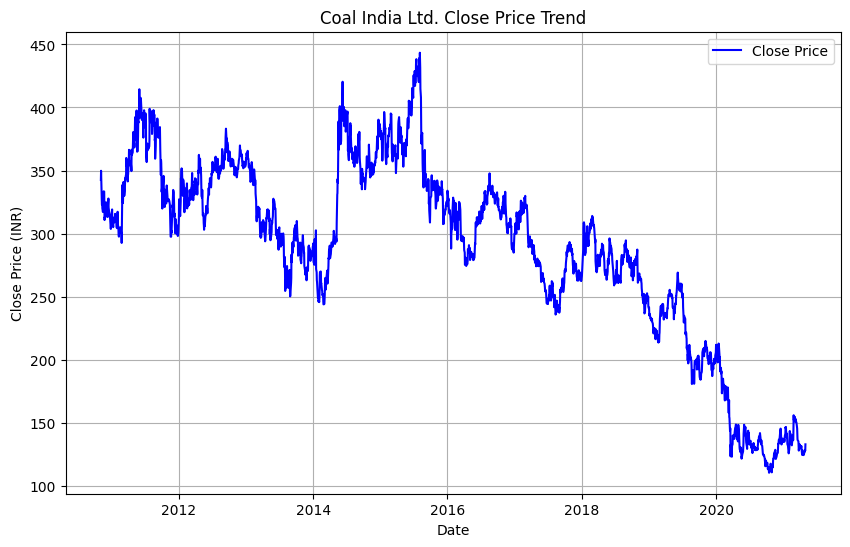

In [12]:
# Convert 'Date' column to datetime format
main_dataset1['Date'] = pd.to_datetime(main_dataset1['Date'])

# Plotting the trend
plt.figure(figsize=(10, 6))
plt.plot(main_dataset1['Date'], main_dataset1['Close'], label='Close Price', color='blue')
plt.title('Coal India Ltd. Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Define the function to create sequences of data
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [7]:
# Set sequence length
sequence_length = 10

# Create sequences
X, y = create_sequences(data_scaled, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **GRU MODEL**

In [19]:
# Define the GRU model
model = Sequential([
    GRU(units=64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    GRU(units=32),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

In [22]:
# Train the model with more epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.7675e-04 - val_loss: 5.5171e-04
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.0971e-04 - val_loss: 5.3991e-04
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.1697e-04 - val_loss: 5.2636e-04
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.0818e-04 - val_loss: 5.2237e-04
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.1122e-04 - val_loss: 5.1649e-04
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.5868e-04 - val_loss: 5.2394e-04
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.4637e-04 - val_loss: 5.1495e-04
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.8067e-04 - val_loss: 5.0885e-04
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.6926e-04 - val_loss: 4.9732e-04
Epoch 10/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.5718e-04 - val_loss: 4.9889e-04
Epoch 11/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss

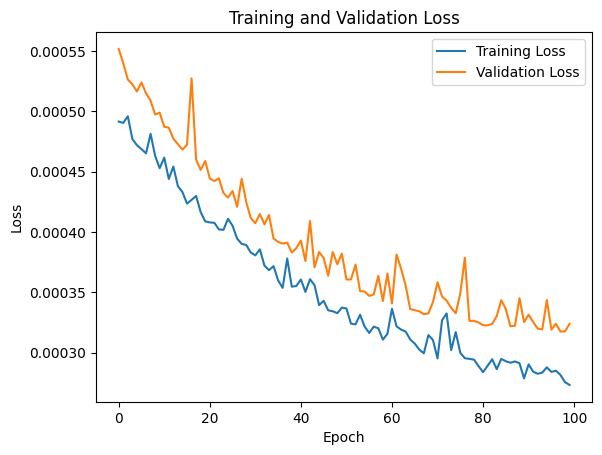

In [23]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **RNN MODEL**

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN

In [31]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the RNN model
model = Sequential([
    SimpleRNN(units=64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True),
    SimpleRNN(units=32, activation='relu'),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define a learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1, callbacks=[reduce_lr])

# Print the model summary
model.summary()

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0370 - val_loss: 9.4262e-04 - learning_rate: 0.0010
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.7868e-04 - val_loss: 5.9732e-04 - learning_rate: 0.0010
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2911e-04 - val_loss: 5.4810e-04 - learning_rate: 0.0010
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.5246e-04 - val_loss: 8.4345e-04 - learning_rate: 0.0010
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3888e-04 - val_loss: 4.4236e-04 - learning_rate: 0.0010
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.2967e-04 - val_loss: 4.9245e-04 - learning_rate: 0.0010
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.2540e-04 - val_loss: 4.0927e-04 - learning_rate: 0.0010
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.5960e-04 - val_loss: 4.4157e-04 - learning_rate: 0.0010
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.6287e-04 - val_

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 10, 64)         │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,085 (86.27 KB)

 Trainable params: 7,361 (28.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,724 (57.52 KB)

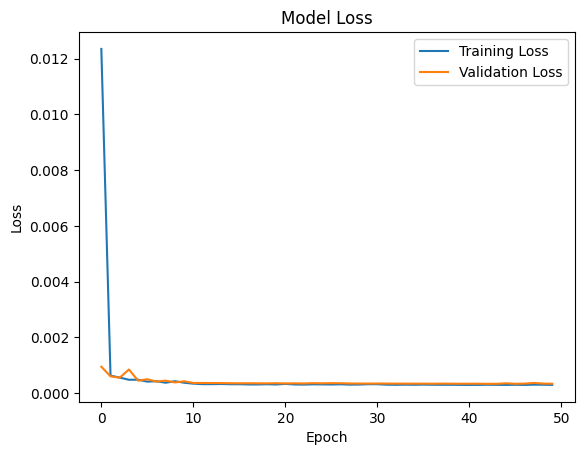

In [32]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()